In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

from os.path import exists
#
if not exists(".isparent"):
    %cd -q ../
! echo "current working dir:" $(pwd)

current working dir: /home/opisthofulax/PhD/projects/ising-model


In [2]:
pthconfig = "res/config/.config_acf_test"
df = pd.read_csv(pthconfig)
df

,tMC,N_M,nconf,_m_sav,Navg,L1,L2,Ls,b_m,b_M,b_s,_m_init,_m_upd,_m_mea
0,1,200,3,1,20,10,10,10,0.01,0.44,0.02,hs_unif,algo_metro_a,1


In [3]:
L1, L2 = df['L1'][0], df['L2'][0];
N = L1 * L2
Nlst = []
while (N <= df['N_M'][0]):
    Nlst.append(N)
    L1 += df['Ls'][0]
    L2 += df['Ls'][0]
    N = L1 * L2;
betalst = np.arange(df['b_m'][0], df['b_M'][0], df['b_s'][0])
#
color = plt.cm.rainbow(np.linspace(0, 1, len(Nlst)))
norm = mpc.Normalize(vmin=min(betalst), vmax=max(betalst))
cmap = plt.cm.gist_rainbow_r

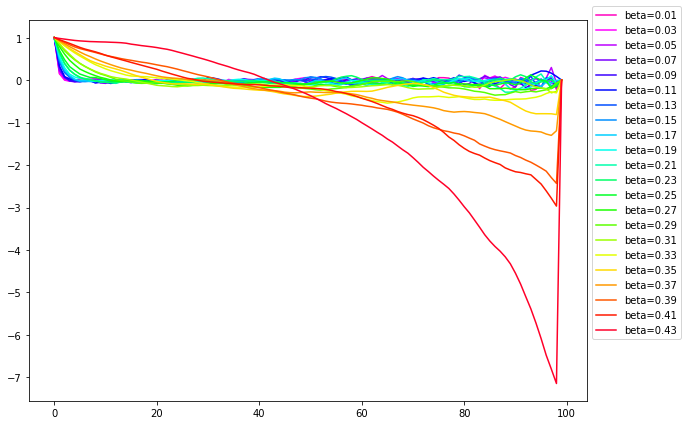

In [4]:
N = 100
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
tauint = []
plt.figure(figsize=(10, 7))
for beta in betalst:
    pth = f"res/obs/N={N:d}-{df['_m_init'][0]}-{df['_m_upd'][0]}/bt={beta:.2g}/tauint_avg={df['Navg'][0]:d}.bin"
    tauint.append([1/beta, np.fromfile(pth, dtype=np.double)[0]])
    pth = f"res/obs/N={N:d}-{df['_m_init'][0]}-{df['_m_upd'][0]}/bt={beta:.2g}/ACF_avg={df['Navg'][0]:d}.bin"
    acf = np.fromfile(pth, dtype=np.double)
    plt.plot(acf[:100], '-', color=m.to_rgba(beta), label=fr"beta={beta:.3g}")
# plt.xlim(0, 100)
# plt.ylim()
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels, bbox_to_anchor=(1.0, 1.05))
# plt.yscale('log')

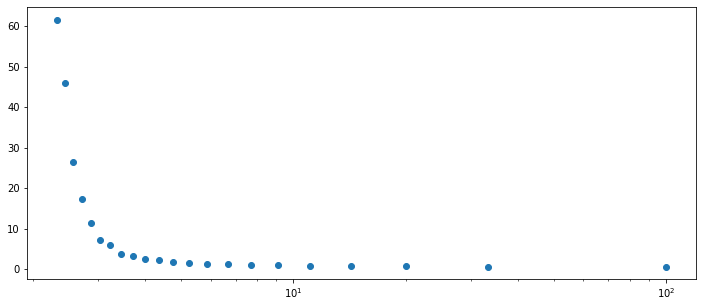

In [51]:
plt.figure(figsize=(12,  5))
plt.plot(np.array(tauint)[::-1,0], np.array(tauint)[::-1,1], 'o')
plt.xscale("log")

In [ ]:

m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
for N in [36100]:
    for beta in betalst[2:]:
        try:
            pth = f"res/obs/N={N:d}/bt={beta:.2g}/ACF_avg={df['Navg'][0]:d}.bin"
            acf = np.fromfile(pth, dtype=np.double)
            midx = np.argmax(acf<1/np.exp(1))
            x = np.linspace(1, midx, num=midx)
            plt.plot(x[1:], acf[1:midx], '-', color=m.to_rgba(beta), label=fr"beta={beta:.3g}")
        except:
            pass
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels, bbox_to_anchor=(1.0, 1.05))
# plt.yscale("log")
# plt.xscale("log")
# plt.legend()
# plt.xlim(0, 100)

In [ ]:
Nlst